In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/train.7z


In [2]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.datasets import cifar10

import matplotlib.pyplot as plt 

# loading  the data

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Shape of training data and labels are - ',X_train.shape,y_train.shape)
print('Shape of test data and labels are - ',X_test.shape,y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
Shape of training data and labels are -  (50000, 32, 32, 3) (50000, 1)
Shape of test data and labels are -  (10000, 32, 32, 3) (10000, 1)


In [4]:
# lets look at training data into much more detail 
print('Nummber of images - ',X_train.shape[0])
print('Dimensions of an image - ',X_train.shape[1:3])
print('Number of channels - ',X_train.shape[-1])

Nummber of images -  50000
Dimensions of an image -  (32, 32)
Number of channels -  3


Therefore, the training data contains 50000 images, where each image is a 32*32 pixeled and having 3 channels (R,G,B)

# visualizing an image as three separate channels

the single image is 32*32 pixels and has three channels (R,G,B), now, lets separate out the channels and view how the three channels look like


In [77]:
def show_channels(img):
    plt.imshow(img)
    plt.title('Original image')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    
    fit,ax = plt.subplots(1,3,figsize = (12,6))
    ax[0].imshow(red_channel,cmap = 'Reds')
    ax[0].set_title('Red Channel')
    ax[1].imshow(green_channel,cmap = 'Greens')
    ax[1].set_title('Green Channel')
    ax[2].imshow(blue_channel,cmap = 'Blues')
    ax[2].set_title('Blue channel')
    for i in range(3):
        ax[i].set_xticks([])
        ax[i].set_yticks([])

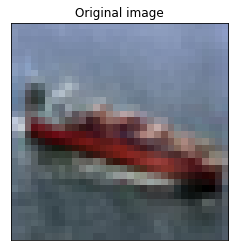

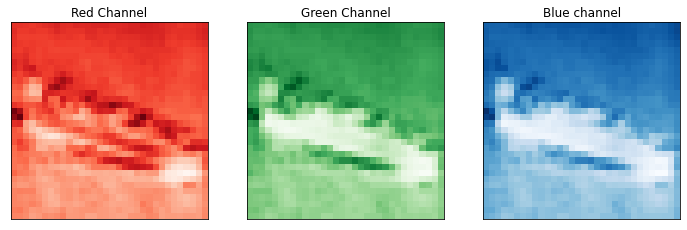

In [80]:
idx = np.random.randint(50000)
show_channels(X_train[idx])

# Lets now look at data classes

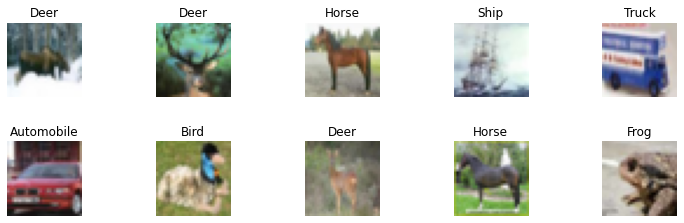

In [20]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
sample = np.random.choice(np.arange(50000),10) #to get random indices
 

fig, axes = plt.subplots(2, 5, figsize=(12,4))
axes = axes.ravel()

for i in range(10):
    idx = sample[i]
    axes[i].imshow(X_train[idx])
    axes[i].set_title(labels[y_train[idx][0]])
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)



# Data Preprocessing

In [21]:
# normalizing the data
X_train = X_train / 255
X_test = X_test / 255 

In [22]:
#one hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

# Model - 1 - Flatten

In [23]:
len_flatten = np.product(X_train.shape[1:])
X_train_flatten = X_train.reshape(X_train.shape[0],len_flatten)
X_test_flatten = X_test.reshape(X_test.shape[0],len_flatten)

In [24]:
print(X_train_flatten.shape,y_train.shape)

(50000, 3072) (50000, 10)


In [25]:
model = Sequential()

model.add(Dense(units=1024, activation='relu', input_shape=(len_flatten,)))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

In [26]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_flatten, y_train, epochs=50, validation_split=.3)


Epoch 1/50
1094/1094 [==============================] - 5s 5ms/step - loss: 2.0854 - accuracy: 0.2205 - val_loss: 1.9142 - val_accuracy: 0.2843
Epoch 2/50
1094/1094 [==============================] - 4s 4ms/step - loss: 1.9104 - accuracy: 0.2938 - val_loss: 1.8556 - val_accuracy: 0.3300
Epoch 3/50
1094/1094 [==============================] - 4s 4ms/step - loss: 1.8633 - accuracy: 0.3180 - val_loss: 1.8195 - val_accuracy: 0.3451
Epoch 4/50
1094/1094 [==============================] - 6s 5ms/step - loss: 1.8235 - accuracy: 0.3331 - val_loss: 1.7660 - val_accuracy: 0.3607
Epoch 5/50
1094/1094 [==============================] - 5s 4ms/step - loss: 1.7952 - accuracy: 0.3455 - val_loss: 1.7239 - val_accuracy: 0.3819
Epoch 6/50
1094/1094 [==============================] - 5s 4ms/step - loss: 1.7785 - accuracy: 0.3557 - val_loss: 1.7273 - val_accuracy: 0.3751
Epoch 7/50
1094/1094 [==============================] - 4s 4ms/step - loss: 1.7595 - accuracy: 0.3563 - val_loss: 1.7132 - val_accuracy:

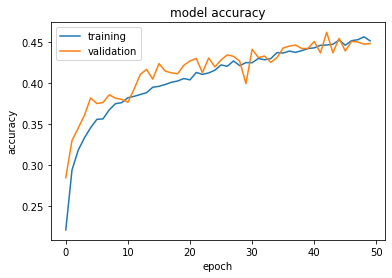

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()



In [28]:
_,test_acc = model.evaluate(X_test_flatten, y_test)
print('Test accuracy is ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5276 - accuracy: 0.4478
Test accuracy is  0.44780001044273376


# Model 2 - converting it to grayscale by mean

We have seen earlier that the image in colored format has three chaneels, R G and B. To convert it to a single channel we will take mean of the all three channels, so the three channels will have equal contribution to the final image

In [82]:
# now lets apply this function to get the 
X_train_g1 = np.mean(X_train, -1)
X_test_g1 = np.mean(X_test,-1)

Lets again look at the first image

In [90]:
def show_org_and_modified(org,mod):
    fig,ax = plt.subplots(1,2,figsize = (8,16))
    ax[0].imshow(org)
    ax[0].set_title('original image')
    ax[1].imshow(mod,cmap='Greys')
    ax[1].set_title('grey scaled')

    ax[0].axis('off')
    ax[1].axis('off')

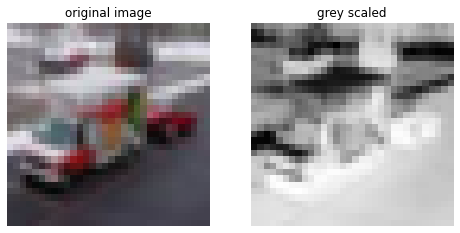

In [94]:
idx = np.random.randint(50000)
show_org_and_modified(X_train[idx],X_train_g1[idx])

In [57]:
len_flatten = np.product(X_train_g1.shape[1:])
X_train_g1 = X_train_g1.reshape(X_train_g1.shape[0],len_flatten)
X_test_g1 = X_test_g1.reshape(X_test_g1.shape[0],len_flatten)

print('Shape of data is - ')
print(X_train_g1.shape,y_train.shape)


Shape of data is - 
(50000, 1024) (50000, 10)


In [75]:
model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(len_flatten,)))
model.add(Dropout(0.2))

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

Epoch 1/50
1094/1094 [==============================] - 4s 4ms/step - loss: 2.1892 - accuracy: 0.1725 - val_loss: 2.0734 - val_accuracy: 0.2270
Epoch 2/50
1094/1094 [==============================] - 4s 4ms/step - loss: 2.0662 - accuracy: 0.2416 - val_loss: 2.0004 - val_accuracy: 0.2726
Epoch 3/50
1094/1094 [==============================] - 4s 4ms/step - loss: 2.0103 - accuracy: 0.2691 - val_loss: 1.9660 - val_accuracy: 0.2902
Epoch 4/50
1094/1094 [==============================] - 4s 4ms/step - loss: 1.9815 - accuracy: 0.2815 - val_loss: 1.9363 - val_accuracy: 0.3003
Epoch 5/50
1094/1094 [==============================] - 4s 4ms/step - loss: 1.9540 - accuracy: 0.2900 - val_loss: 1.9190 - val_accuracy: 0.3101
Epoch 6/50
1094/1094 [==============================] - 4s 4ms/step - loss: 1.9373 - accuracy: 0.2979 - val_loss: 1.9449 - val_accuracy: 0.2898
Epoch 7/50
1094/1094 [==============================] - 4s 4ms/step - loss: 1.9250 - accuracy: 0.3010 - val_loss: 1.8838 - val_accuracy:

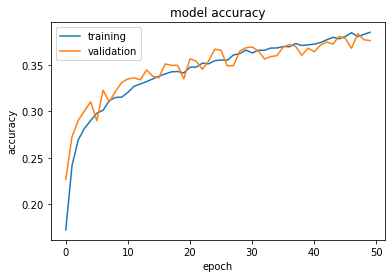

In [76]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_g1, y_train, epochs=50, validation_split=.3)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()



In [79]:
_,test_acc = model.evaluate(X_test_g1, y_test)
print('Test accuracy is ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.7446 - accuracy: 0.3814
Test accuracy is  0.3813999891281128


# Method -3 - Converting to Grayscale  

In [96]:
X_train_g2 = np.dot(X_train[...,:3], [0.299, 0.587, 0.114])
X_test_g2 = np.dot(X_test[...,:3], [0.299, 0.587, 0.114])

In [97]:
X_train_g2.shape

(50000, 32, 32)

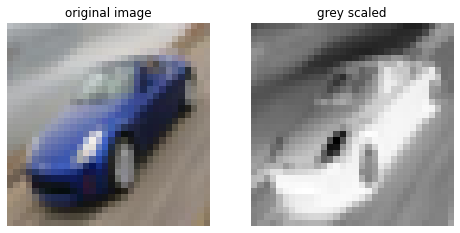

In [104]:
idx = np.random.randint(50000)
show_org_and_modified(X_train[idx],X_train_g2[idx])

In [105]:
len_flatten = np.product(X_train_g2.shape[1:])
X_train_g2 = X_train_g2.reshape(X_train_g2.shape[0],len_flatten)
X_test_g2 = X_test_g2.reshape(X_test_g2.shape[0],len_flatten)

print('Shape of data is - ')
print(X_train_g2.shape,y_train.shape)



Shape of data is - 
(50000, 1024) (50000, 10)


Epoch 1/50
1094/1094 [==============================] - 4s 4ms/step - loss: 2.1844 - accuracy: 0.1726 - val_loss: 2.0620 - val_accuracy: 0.2411
Epoch 2/50
1094/1094 [==============================] - 4s 4ms/step - loss: 2.0593 - accuracy: 0.2417 - val_loss: 1.9937 - val_accuracy: 0.2814
Epoch 3/50
1094/1094 [==============================] - 4s 4ms/step - loss: 2.0193 - accuracy: 0.2577 - val_loss: 1.9767 - val_accuracy: 0.2802
Epoch 4/50
1094/1094 [==============================] - 4s 4ms/step - loss: 1.9928 - accuracy: 0.2744 - val_loss: 1.9384 - val_accuracy: 0.3025
Epoch 5/50
1094/1094 [==============================] - 4s 4ms/step - loss: 1.9673 - accuracy: 0.2821 - val_loss: 1.9310 - val_accuracy: 0.3047
Epoch 6/50
1094/1094 [==============================] - 4s 4ms/step - loss: 1.9500 - accuracy: 0.2925 - val_loss: 1.8958 - val_accuracy: 0.3098
Epoch 7/50
1094/1094 [==============================] - 4s 4ms/step - loss: 1.9362 - accuracy: 0.2956 - val_loss: 1.8817 - val_accuracy:

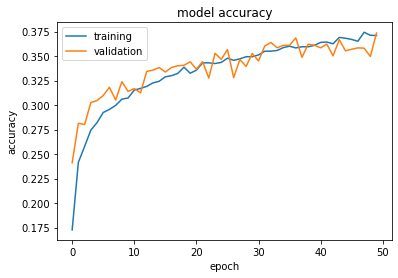

313/313 [==============================] - 1s 2ms/step - loss: 1.7497 - accuracy: 0.3802
Test accuracy is  0.38019999861717224


In [74]:
model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(len_flatten,)))
model.add(Dropout(0.2))

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_g2, y_train, epochs=50, validation_split=.3)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()



_,test_acc = model.evaluate(X_test_g2, y_test)
print('Test accuracy is ',test_acc)